In [21]:
import  pandas as pd
import numpy as np
import pandas_ta
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [22]:
df = pd.read_csv('tips.csv')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# basic staticstic
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [25]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0])

In [26]:
#checking duplicate
df.duplicated().sum()

df.loc[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


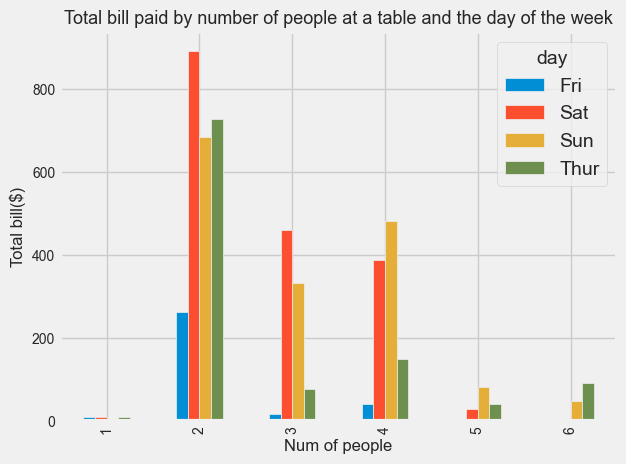

In [27]:
# Total bill paid by number of people at a table and the day of the week
total_bill = pd.DataFrame(df.groupby(['size', 'day'])['total_bill'].sum()).reset_index()
day = total_bill['day'].unique()
# reshape data
total_bill_size_day = total_bill.pivot(index='size', columns='day', values='total_bill')


# chart
total_bill_size_day.plot(kind="bar")
plt.xlabel('Num of people', fontsize=12)
plt.ylabel('Total bill($)', fontsize=12)
plt.title('Total bill paid by number of people at a table and the day of the week', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [28]:
total_bill = pd.DataFrame(df.groupby(['size', 'sex'])['total_bill'].sum()).reset_index()

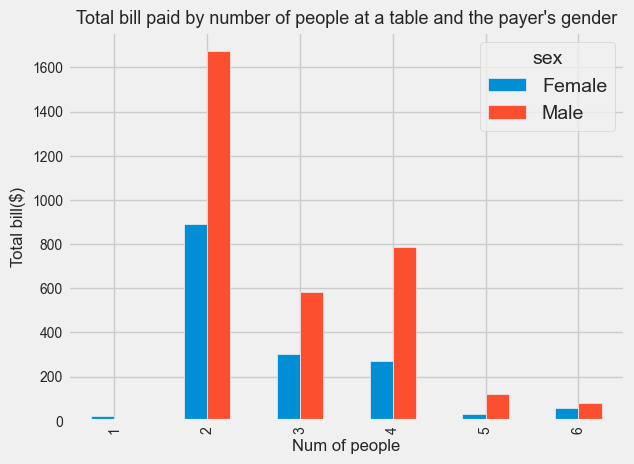

In [29]:
# Total bill paid by number of people at a table and the payer's gender
total_bill = pd.DataFrame(df.groupby(['size', 'sex'])['total_bill'].sum()).reset_index()

# reshape data
total_bill_size_gender = total_bill.pivot(index='size', columns='sex', values='total_bill')
total_bill_size_gender

# chart
total_bill_size_gender.plot(kind="bar")
plt.xlabel('Num of people', fontsize=12)
plt.ylabel('Total bill($)', fontsize=12)
plt.title("Total bill paid by number of people at a table and the payer's gender", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

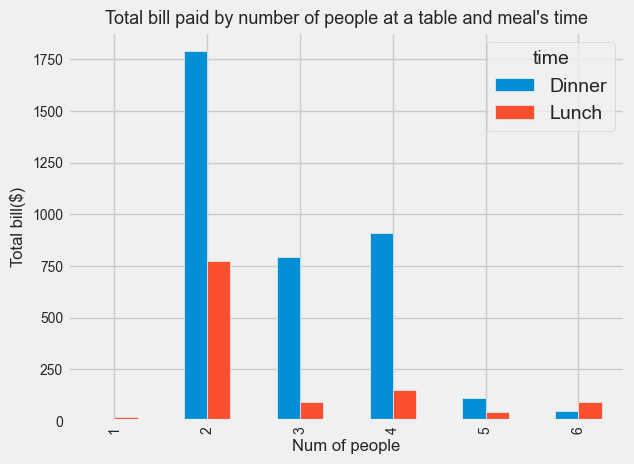

In [30]:
# Total bill paid by number of people at a table and meal's time
total_bill = pd.DataFrame(df.groupby(['size', 'time'])['total_bill'].sum()).reset_index()

# reshape data
total_bill_size_gender = total_bill.pivot(index='size', columns='time', values='total_bill')
total_bill_size_gender

# chart
total_bill_size_gender.plot(kind="bar")
plt.xlabel('Num of people', fontsize=12)
plt.ylabel('Total bill($)', fontsize=12)
plt.title("Total bill paid by number of people at a table and meal's time", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Machine Learning **model**

In [31]:
# Encoding by using LabelEncoder

label_encoder = LabelEncoder()
df['gender_encode'] = label_encoder.fit_transform(df['sex'])
df['smoker_encode'] = label_encoder.fit_transform(df['smoker'])
df['time_encode'] = label_encoder.fit_transform(df['time'])

# One-hot encoding for date columns
df = pd.get_dummies(df, columns=['day'], prefix=['day'])

In [32]:
df.drop(columns = ['sex', 'smoker', 'time'], axis = 1, inplace= True)

In [33]:
df

,total_bill,tip,size,gender_encode,smoker_encode,time_encode,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0,0,0,0,0,1,0
1,10.34,1.66,3,1,0,0,0,0,1,0
2,21.01,3.50,3,1,0,0,0,0,1,0
3,23.68,3.31,2,1,0,0,0,0,1,0
4,24.59,3.61,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,0,1,0,0
240,27.18,2.00,2,0,1,0,0,1,0,0
241,22.67,2.00,2,1,1,0,0,1,0,0
242,17.82,1.75,2,1,0,0,0,1,0,0


In [34]:
## train - test split

x = df.drop(columns = 'tip', axis = 1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [35]:
print("X_train's size: ", X_train.shape)
print("X_test's size: ", X_test.shape)
print("y_train's size: ", y_train.shape)
print("y_test's size: ", y_test.shape)


X_train's size:  (195, 9)
X_test's size:  (49, 9)
y_train's size:  (195,)
y_test's size:  (49,)


In [36]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate model 

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = sqrt(mse)

# Printout relevant metrics
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination (r2 score):", r2_score(y_test, y_pred))
print("Mean Square Error (MSE):", mse)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error(MAE): 0.6671331480264893
Coefficient of Determination (r2 score): 0.43730181943482505
Mean Square Error (MSE): 0.7033566017436105
Root Mean Square Error (RMSE): 0.838663580790063


/var/folders/71/ygrm6v2d3zq5y8nmqn34lsbw0000gn/T/ipykernel_26694/3641424677.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(y_train.append(y_test)).reset_index(drop = True)
/var/folders/71/ygrm6v2d3zq5y8nmqn34lsbw0000gn/T/ipykernel_26694/3641424677.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  valid = pd.DataFrame(y_train.append(pd.Series(y_pred))).reset_index(drop = True)


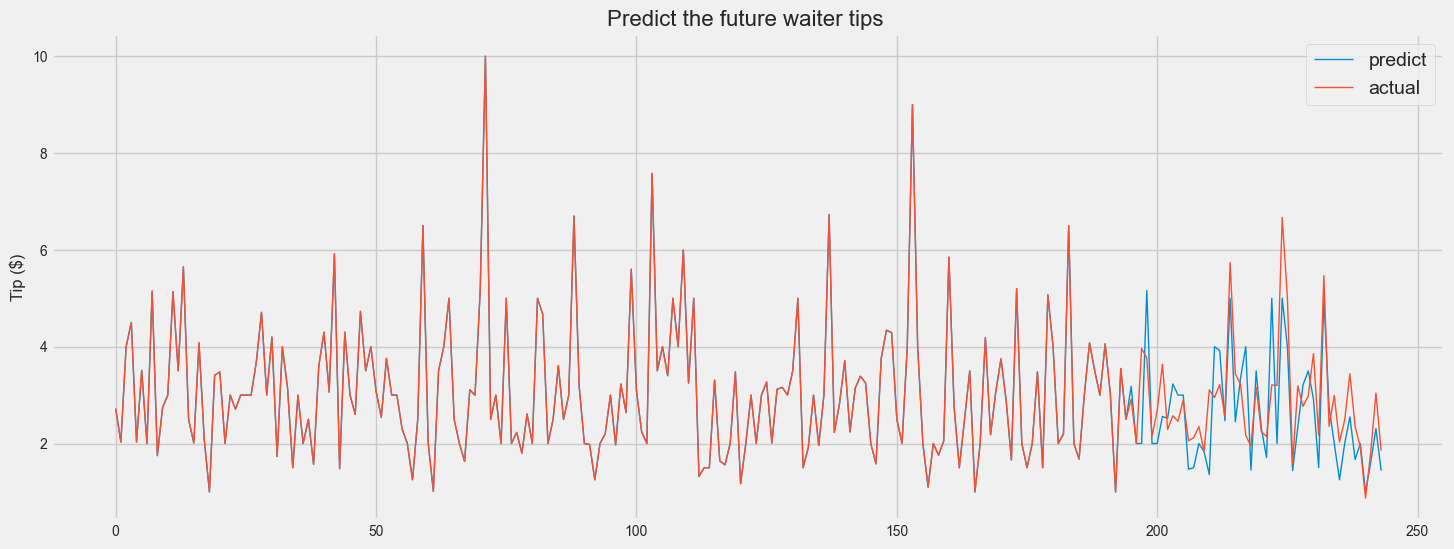

In [38]:
data = pd.DataFrame(y_train.append(y_test)).reset_index(drop = True)
valid = pd.DataFrame(y_train.append(pd.Series(y_pred))).reset_index(drop = True)
valid.rename(columns ={0 : 'tip'}, inplace = True)


# chart show predict result

plt.figure(figsize=(16,6))
plt.plot(data['tip'], linewidth = 1, label = 'predict')
plt.plot(valid['tip'], linewidth = 1, label = 'actual')
# Set labels and title
plt.legend()

plt.ylabel('Tip ($)', fontsize=12)
plt.title('Predict the future waiter tips ', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show;

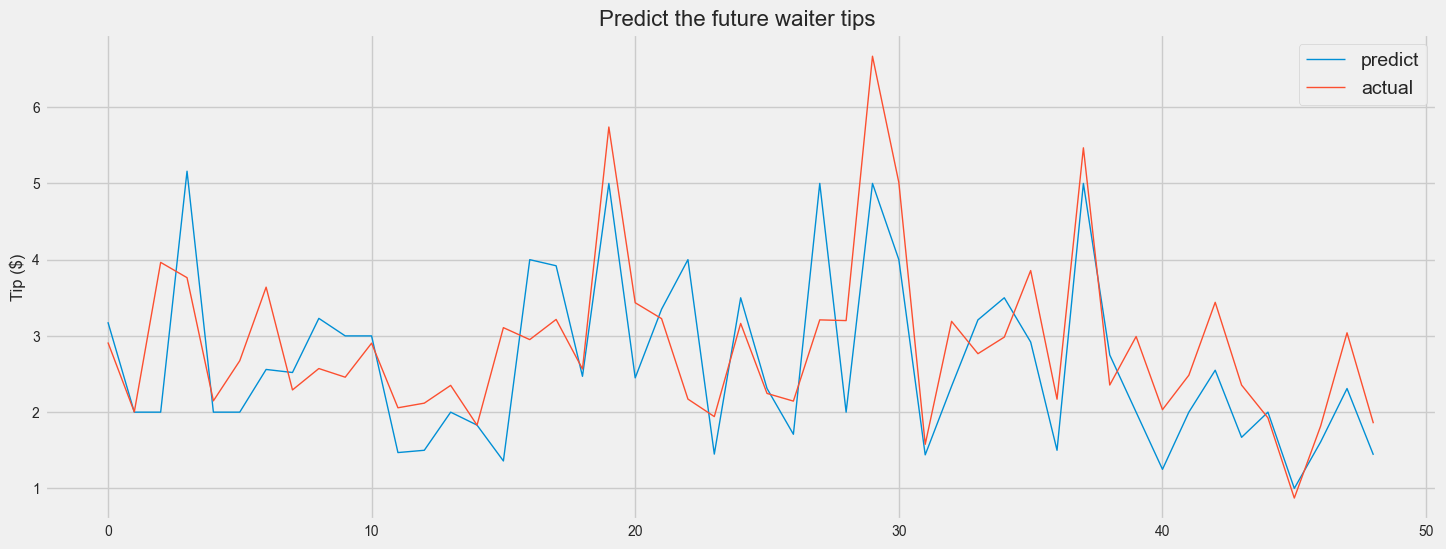

In [39]:
valid = pd.DataFrame(y_test).reset_index(drop = True)
valid['pred'] = y_pred



# chart show predict result

plt.figure(figsize=(16,6))
plt.plot(valid['tip'], linewidth = 1, label = 'predict')
plt.plot(valid['pred'], linewidth = 1, label = 'actual')
# Set labels and title
plt.legend()

plt.ylabel('Tip ($)', fontsize=12)
plt.title('Predict the future waiter tips ', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show;

In [40]:
# export file
valid.to_csv('result_predict_tips.csv', index = True)